In [1]:
# Importacion de librerias a utilizar
import os
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

¿Qué preguntas quiero contestar?

1. Calidad del Aire (Emisiones de CO2)

    * ¿Cuál/es es/son la/s variable/s que más influyen en la emisión de CO2? (fuel type, VClass, drive, ghgScore)
    * ¿Y en el consumo?
    * ¿Cuáles son los modelos con menos emisiones en gramos por milla?

Campo Target Main: co2TailpipeGpm (emisiones de CO2 en gramos por milla, medido en la punta del caño de escape)

In [2]:
fuel_economy = pd.read_csv(r'Datasets_clean\Vehicle Fuel Economy Data.csv')
fuel_economy.head()

,Year,Manufacturer,Model,co2TailpipeGpm,city08,highway08,fuelType1,ghgScore,VClass,drive,fuelCost08,fuelCostA08
0,2017,BMW,M6 Coupe,519.0,15.0,22.0,Premium Gasoline,3.0,Subcompact Cars,2-Wheel Drive,3850.0,0.0
1,2017,BMW,X3 sDrive28i,374.0,21.0,28.0,Premium Gasoline,5.0,Small Sport Utility Vehicle,2-Wheel Drive,2700.0,0.0
2,2016,Infiniti,Q50S Red Sport,402.0,20.0,26.0,Premium Gasoline,5.0,Midsize Cars,2-Wheel Drive,2950.0,0.0
3,2017,MINI,John Cooper Works Convertible,327.0,24.0,32.0,Premium Gasoline,6.0,Minicompact Cars,2-Wheel Drive,2400.0,0.0
4,2017,Kia,Sedona SX,433.0,18.0,25.0,Regular Gasoline,4.0,Minivan,2-Wheel Drive,2550.0,0.0


In [3]:
#genero una clave con Year, Manufacturer, Model para referenciar todas las variables a un solo tipo de auto
Key = fuel_economy['Year'].astype(str) + "_" + fuel_economy['Manufacturer'] + "_" + fuel_economy['Model']

fuel_economy.insert(0, 'Key', Key)

fuel_economy.head()

,Key,Year,Manufacturer,Model,co2TailpipeGpm,city08,highway08,fuelType1,ghgScore,VClass,drive,fuelCost08,fuelCostA08
0,2017_BMW_M6 Coupe,2017,BMW,M6 Coupe,519.0,15.0,22.0,Premium Gasoline,3.0,Subcompact Cars,2-Wheel Drive,3850.0,0.0
1,2017_BMW_X3 sDrive28i,2017,BMW,X3 sDrive28i,374.0,21.0,28.0,Premium Gasoline,5.0,Small Sport Utility Vehicle,2-Wheel Drive,2700.0,0.0
2,2016_Infiniti_Q50S Red Sport,2016,Infiniti,Q50S Red Sport,402.0,20.0,26.0,Premium Gasoline,5.0,Midsize Cars,2-Wheel Drive,2950.0,0.0
3,2017_MINI_John Cooper Works Convertible,2017,MINI,John Cooper Works Convertible,327.0,24.0,32.0,Premium Gasoline,6.0,Minicompact Cars,2-Wheel Drive,2400.0,0.0
4,2017_Kia_Sedona SX,2017,Kia,Sedona SX,433.0,18.0,25.0,Regular Gasoline,4.0,Minivan,2-Wheel Drive,2550.0,0.0


# **1. Evolución de Emisiones de CO2 a los largo de los años**

In [4]:
#Creo un DF con los datos que me interesan para el gráfico:
evolucion = fuel_economy[['Year', 'co2TailpipeGpm']]
evolucion.head()

,Year,co2TailpipeGpm
0,2017,519.0
1,2017,374.0
2,2016,402.0
3,2017,327.0
4,2017,433.0


In [5]:
#Agrupar los datos por año y calcular el promedio de las emisiones
evolucion = evolucion.groupby(['Year']).mean().reset_index()

In [6]:
#Elimino los datos 0, ya que se considera imposible 0 emisión =>> HABRÍA QUE REVISAR EL ETL TAMBIÉN PARA VER CÓMO TRATAR ESTOS DATOS
#evolucion = evolucion.loc[evolucion['co2TailpipeGpm'] != 0.0]

C:\Users\Windows\AppData\Local\Temp\ipykernel_6344\843553320.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(evolucion['Year'], rotation=90)


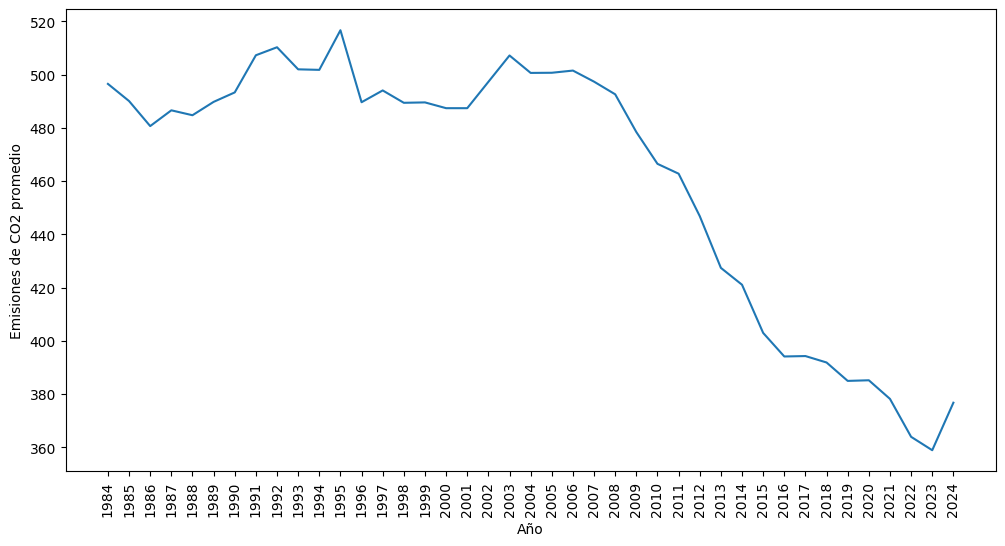

In [6]:
#Crear una figura
fig,ax = plt.subplots(figsize= (12,6))

#Crear el gráfico de barras
ax.plot(
    evolucion['Year'].astype('str'),
    evolucion['co2TailpipeGpm']
)

#Configurar las etiquetas del eje x
ax.set_xticklabels(evolucion['Year'], rotation=90)

#Configurar los títulos
ax.set_xlabel('Año')
ax.set_ylabel('Emisiones de CO2 promedio')

#Mostrar gráfico
plt.show()

**Claramente, la tendencia a fabricar vehículos con cada vez menos emisiones de CO2 es clara y se intensifica a partir del 2004.**

# **2. Cuáles son los modelos que menos emiten en el último año (2022)**

In [14]:
#Creo el DF con Key y co2TailpipeGpm
modelos = fuel_economy[['Key', 'co2TailpipeGpm']]

In [15]:
#Filtro por Year 2023
filtro_anio = (fuel_economy['Year'] == 2022)
modelos = modelos.loc[filtro_anio]

#Ordeno de menor a mayor por co2TailpipeGpm
modelos['co2TailpipeGpm'] = sorted(modelos['co2TailpipeGpm'])

modelos.head()

,Key,co2TailpipeGpm
1304,2022_Mitsubishi_Eclipse Cross ES 2WD,0.0
1312,2022_Hyundai_Tucson AWD,0.0
1313,2022_Kia_Sportage AWD,0.0
1314,2022_Mitsubishi_Outlander 4WD,0.0
1318,2022_MINI_Cooper Convertible,0.0


In [16]:
#Los autos eléctricos tiene 0 emisión de CO2 por lo tanto, no serán conciderados en el siguiente gráfico
modelos = modelos.loc[modelos['co2TailpipeGpm'] != 0.0]

In [17]:
#Tomo los N primeros valores
modelos = modelos.head(30)

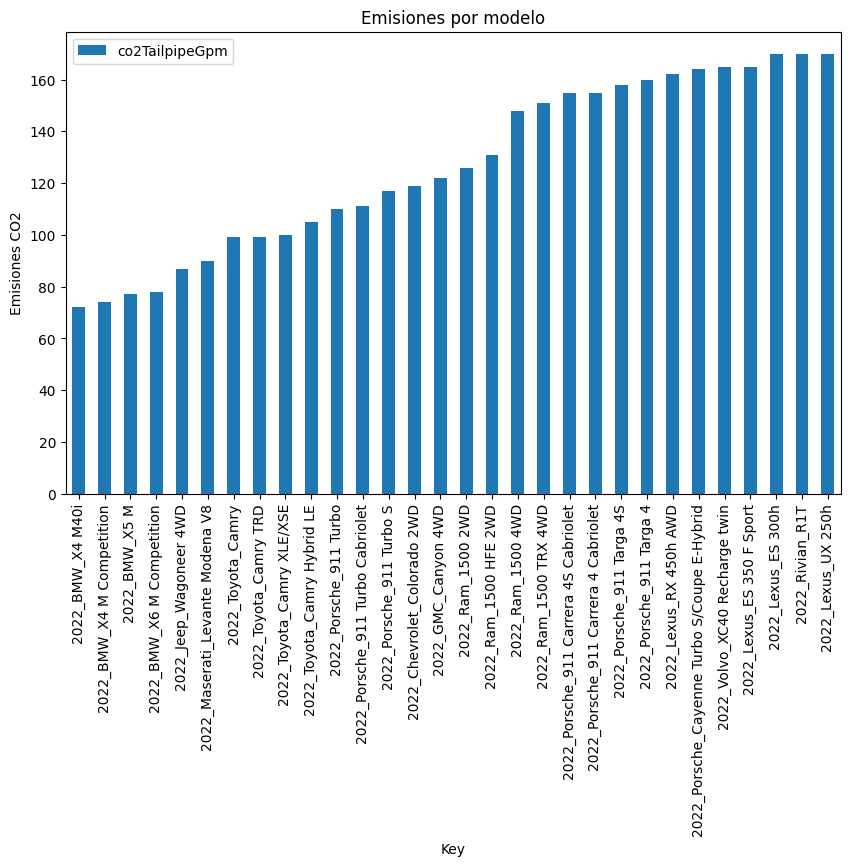

In [18]:
#Hago gráfico de barras

ax = modelos.set_index('Key').plot(kind='bar', stacked= True, figsize=(10,6))

ax.set_ylabel('Emisiones CO2')
ax.set_title('Emisiones por modelo')

plt.show()

**Obtuvimos un listado de los modelos de vehículos que menos CO2 emiten por milla. Hay muchos vehículos de lujo que seguramente no serán tenidos en cuenta a la hora contruir una flota de vehículos para transporte de pasajeros (BMW, Masserati, Porche)**

# **3. ¿Esto tiene relación con el costo? ¿Los que menos emiten son también los que mejor consumo tienen?**

In [13]:
costo = fuel_economy[['city08', 'highway08', 'co2TailpipeGpm']]
costo.head()

,city08,highway08,co2TailpipeGpm
0,15.0,22.0,519.0
1,21.0,28.0,374.0
2,20.0,26.0,402.0
3,24.0,32.0,327.0
4,18.0,25.0,433.0


In [14]:
#Los autos eléctricos tiene 0 emisión de CO2 por lo tanto, no serán conciderados en el siguiente gráfico
costo = costo.loc[costo['co2TailpipeGpm'] != 0.0]

d:\Documents\Documents\Data Science\Soy Henry\9- Proyectos\4- PF\Los berracos del dato - PF Taxi\NY_TaxiGreen\taxiGreen_venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


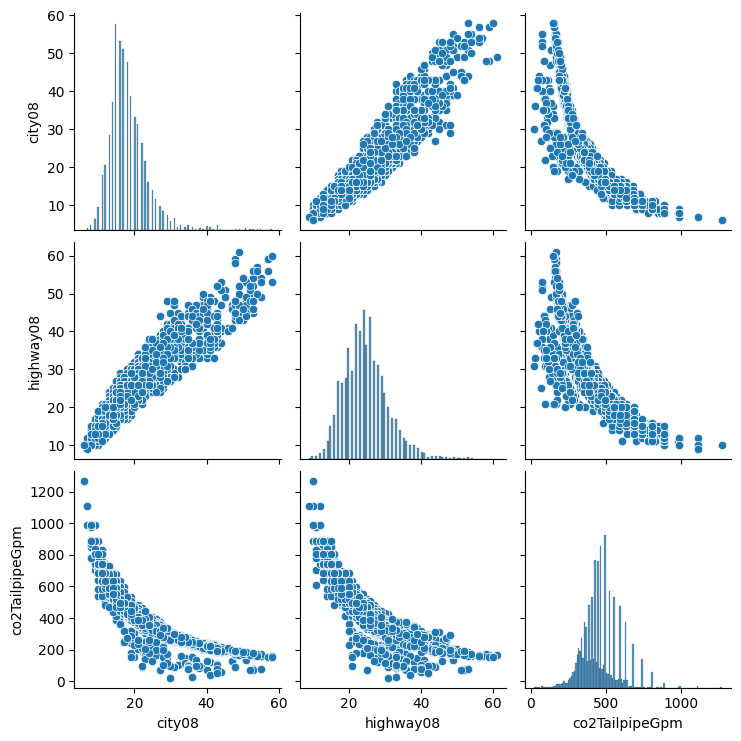

In [15]:
sns.pairplot(data=costo)

**Se ve claramente la relación entre las emisiones y los consumos (en millas por galón), cuanto más millas se recorren con un solo galón de combustible, menos emisiones de CO2.**

# **4. ¿Hay alguna otra variable que pueda ser relacionada directamente con menores emisiones de CO2? Como ser: tipo de vehículo, tracción o tipo de combustible?**

In [19]:
multivar = fuel_economy[['fuelType1', 'VClass', 'drive', 'co2TailpipeGpm']]
multivar.head()

,fuelType1,VClass,drive,co2TailpipeGpm
0,Premium Gasoline,Subcompact Cars,2-Wheel Drive,519.0
1,Premium Gasoline,Small Sport Utility Vehicle,2-Wheel Drive,374.0
2,Premium Gasoline,Midsize Cars,2-Wheel Drive,402.0
3,Premium Gasoline,Minicompact Cars,2-Wheel Drive,327.0
4,Regular Gasoline,Minivan,2-Wheel Drive,433.0


In [17]:
#Los autos eléctricos tiene 0 emisión de CO2 por lo tanto, no serán conciderados en el siguiente gráfico
multivar = multivar.loc[multivar['co2TailpipeGpm'] != 0.0]

In [18]:
le = LabelEncoder()

In [19]:
multivar['fuelType1'] = le.fit_transform(multivar['fuelType1'].astype(str))
multivar['VClass'] = le.fit_transform(multivar['VClass'].astype(str))
multivar['drive'] = le.fit_transform(multivar['drive'].astype(str))

d:\Documents\Documents\Data Science\Soy Henry\9- Proyectos\4- PF\Los berracos del dato - PF Taxi\NY_TaxiGreen\taxiGreen_venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


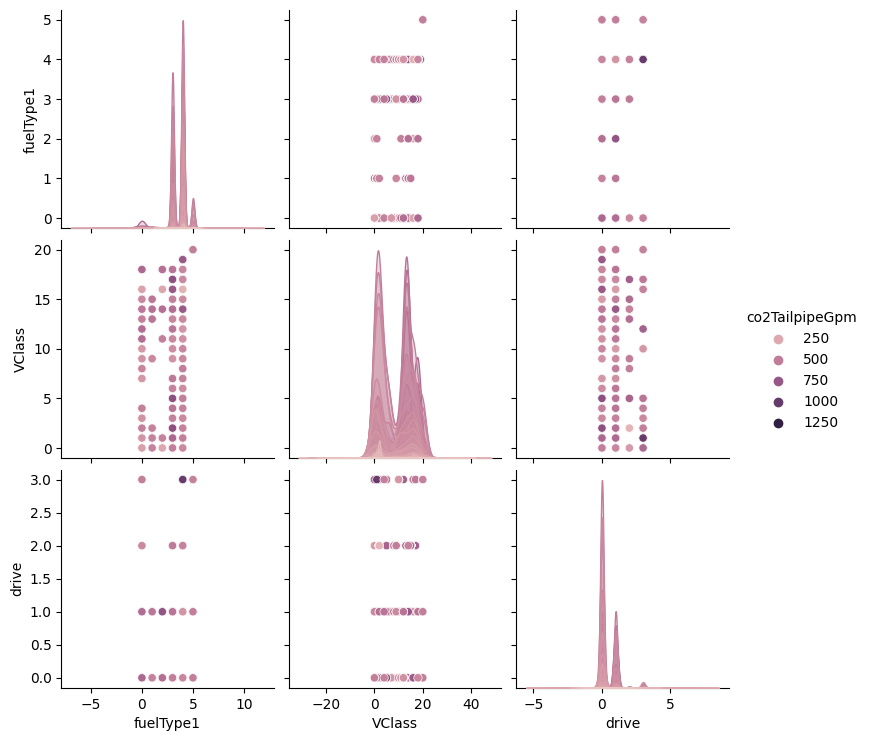

In [20]:
sns.pairplot(data=multivar, hue='co2TailpipeGpm')

**Entremos en detalle en fuel Type**

In [20]:
tipo_comb = fuel_economy[['fuelType1', 'co2TailpipeGpm']]
tipo_comb.head()

,fuelType1,co2TailpipeGpm
0,Premium Gasoline,519.0
1,Premium Gasoline,374.0
2,Premium Gasoline,402.0
3,Premium Gasoline,327.0
4,Regular Gasoline,433.0


In [21]:
#Filtro por año 2022
tipo_comb = tipo_comb.loc[filtro_anio]

In [22]:
#Agrupo por tipo de comb
tipo_comb = tipo_comb.groupby(['fuelType1']).mean().reset_index()

In [23]:
#Ordeno de menor a mayor por co2TailpipeGpm
tipo_comb['co2TailpipeGpm'] = sorted(tipo_comb['co2TailpipeGpm'])
tipo_comb.head()

,fuelType1,co2TailpipeGpm
0,Diesel,0.000000
1,Electricity,351.346260
2,Midgrade Gasoline,426.779886
3,Premium Gasoline,439.464286
4,Regular Gasoline,497.384615


In [27]:
#Los autos diesel emiten CO2, por lo tanto, se concideran valores erroneos y no serán conciderados en el siguiente gráfico
tipo_comb = tipo_comb.loc[tipo_comb['co2TailpipeGpm'] != 0.0]

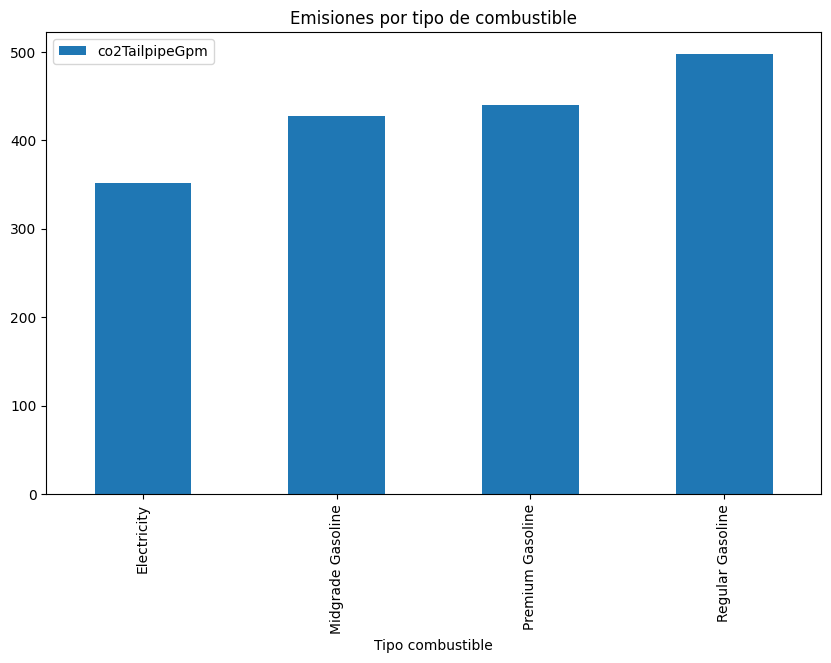

In [28]:
#Hago gráfico de barras

ax = tipo_comb.set_index('fuelType1').plot(kind='bar', stacked= True, figsize=(10,6))

ax.set_xlabel('Tipo combustible')
ax.set_title('Emisiones por tipo de combustible')

plt.show()

**Si bien los vehículos eléctrico emiten menos CO2, la diferencia contra midgrade Gasoline no es tanta.**

# **5. Emisiones promedio por VClass para el año 2022**

In [29]:
veh_class = fuel_economy[['VClass', 'co2TailpipeGpm']]

#Filtro por año 2022
veh_class = veh_class.loc[filtro_anio]

#Agrupo por tipo de comb
veh_class = veh_class.groupby(['VClass']).mean().reset_index()

#Ordeno de menor a mayor por co2TailpipeGpm
veh_class['co2TailpipeGpm'] = sorted(veh_class['co2TailpipeGpm'])
veh_class

,VClass,co2TailpipeGpm
0,Compact Cars,204.208333
1,Large Cars,286.400000
2,Midsize Cars,301.435714
3,Midsize Station Wagons,319.798246
4,Minicompact Cars,330.620253
5,Minivan,333.875000
6,Small Pickup Trucks,357.373494
7,Small Pickup Trucks 4WD,388.142857
8,Small Sport Utility Vehicle,429.700000
9,Small Station Wagons,432.367568


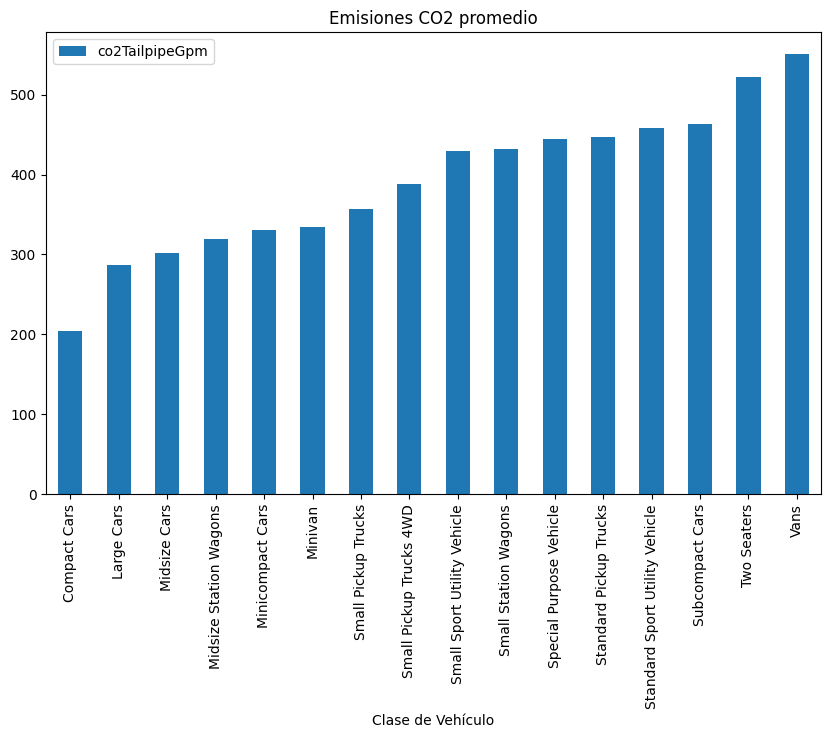

In [28]:
#Hago gráfico de barras

ax = veh_class.set_index('VClass').plot(kind='bar', stacked= True, figsize=(10,6))

ax.set_xlabel('Clase de Vehículo')
ax.set_title('Emisiones CO2 promedio')

plt.show()